# Optimal Stimulus

This section computes the optimal level of public expenditure for any given current unemployment rate by using the sufficient-statistics formula. Before we start, we set up the libraries and read in the helper functions. 

In [8]:
# %load ../py/setup.py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick
import plotly.io as pio
import plotly.express as px
import plotly.offline as py
%run helpers.ipynb

## Calculating Optimal Stimulus

First, we load the calibrated parameter values from our previous section. 

In [9]:
params = pd.read_csv('output/params_suffstat.csv')
params = dict(params.values)
params

{'s': 0.035578947368421,
 'u_bar': 0.0597499999999999,
 'x_bar': 0.557752047505985,
 'GC_bar': 0.1919172928067347,
 'M_bar': 0.5,
 'M_bar_l': 0.0,
 'M_bar_h': 2.0,
 'epsilon': 1.0,
 'epsilon_h': 1.5,
 'epsilon_l': 0.5,
 'eta': 0.6,
 'eta_l': 0.5,
 'eta_h': 0.7,
 'omega': 0.7071671173494025,
 'rho': 1.080804575426955,
 'tau': 0.038731944011991,
 'm_bar': 0.5100528390820994,
 'z0': 2.827830175507158,
 'z1': 2.2609135556386306,
 'GY_bar': 0.1610156123792839}

We want to find out what the optimal stimulus is for any deviation from the steady state. Here, we set $u_0 = 9\%$, which means we want to calculate the optimal stimulus when current unemployment rate is around $3$ percentage points higher than the steady-state value. Feel free to change this value to see how optimal stimulus changes. 

We also set $\eta = 0.6$ and calculate $m$'s for a given range of $M$'s:

In [10]:
u0 = 0.09
M_vals = np.linspace(start=params['M_bar_l'], stop=params['M_bar_h'], num=101)
m_vals = m_func(which='M', M=M_vals, u=params['u_bar'], GY=GY_func(params['GC_bar']), **params)

We now calculate optimal stimulus with the following equation:

                $\frac{g/c - (g/c)^*}{(g/c)^*} \approx \frac{z_0 \epsilon m}{1 + z_1 z_0\epsilon m^2}\cdot \frac{u_0 - \bar{u}}{\bar{u}}.$          [![Generic badge](https://img.shields.io/badge/MS19-Eq%2023-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)  

For convenience, we define the following wrapper, which calculates optimal stimulus as a percentage of GDP for different $\epsilon$'s from the LHS of the equation above using accounting identities:

In [11]:
stim_func = lambda epsilon:GY_func((suffstat_func(m=m_vals, z0=params['z0'], z1=params['z1'],
                                                  epsilon=epsilon, u0=u0, u_bar=params['u_bar']) + 1)*params['GC_bar']) - GY_func(params['GC_bar'])

Below is what optimal stimulus spending looks like for different unemployment multipliers and elasticities of substitution between public and private consumption. For a more detailed discussion of the implications of this graph, go to page 1325 of [Michaillat and Saez (2019](https://www.pascalmichaillat.org/6.html)).

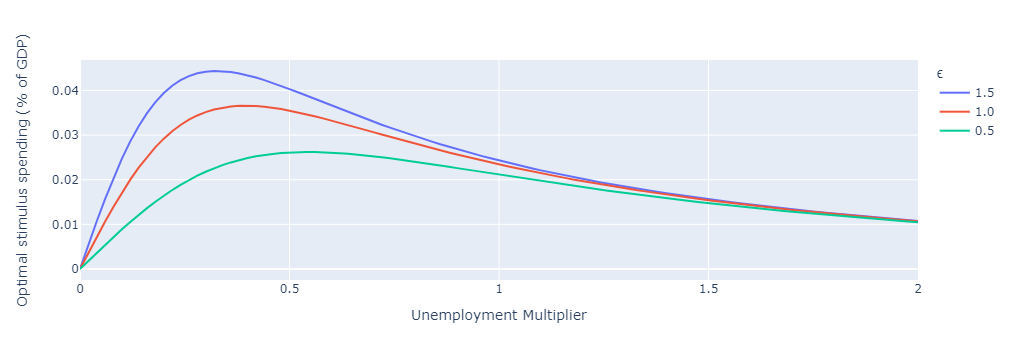

In [12]:
stim_vals = stim_func(epsilon=params['epsilon'])
stim_vals_h = stim_func(epsilon=params['epsilon_h'])
stim_vals_l = stim_func(epsilon=params['epsilon_l'])
stim = pd.DataFrame(data={'M':M_vals,
                          params["epsilon_h"]:stim_vals_h, 
                          params["epsilon"]:stim_vals,
                          params["epsilon_l"]:stim_vals_l})
stim = stim.melt(id_vars=['M'], var_name='ϵ', value_name='G/Y')
fig = px.line(stim, x="M", y='G/Y', color='ϵ', 
              labels={"M": "Unemployment Multiplier",
                      "G/Y": "Optimal stimulus spending (% of GDP)"})
fig

## Storing Optimal Stimulus

We now store the optimal stimulus for your custom $u_0$. 

In [13]:
stim.to_csv('output/stim.csv', index=False)